# TP noté 1 : Jeu de la vie

*Mégane Diéval*

*Le 13/03/2020*

In [1]:
import utils
import matplotlib.pylab as plt
import numpy as np
from matplotlib import animation
import matplotlib.animation as animation

In [2]:
# 1)Chaîne de caractères filename sous le format filename=HMMA238_TP_prenomnom.ipynb

filename = 'HMMA238_TP_meganedieval.ipynb'
print('Le nom du fichier est ' + filename)

Le nom du fichier est HMMA238_TP_meganedieval.ipynb


In [3]:
# 2)Cariable qui compte le nombre de caractères dans la chaîne de caractères filename

# la fonction len nous donne la longueur de la chaîne
taille_str = len(filename)
print('La chaîne filename possède', taille_str, 'caractères')

La chaîne filename possède 29 caractères


In [4]:
# 3)Créaction d'une variable ma_graine qui vaut le reste de la division euclidienne de taille_str par 6

ma_graine = taille_str % 6
print('Ma graîne vaut', ma_graine)

Ma graîne vaut 5


### Implémentation sans `numpy`

Ci-dessous se trouve le code pur Python pour coder ce jeu. Dans la suite on codera les cellules vivantes par des 1 et les cellules mortes par des 0. On rappelle qu'on ne tient pas compte des bords de la grille.
Tout d'abord on définit la fonction *calcul_nb_voisins* :

In [5]:
def calcul_nb_voisins(Z):
    
    """Fonction calculant le nombre de voisins pour une grille composée de 0 et de 1 
    
    Entrée: une matrice composée de 1 et de 0
    Sortie: nombre de voisins de chaque cellule sauf pour le bord
    
    """
    
    forme = len(Z), len(Z[0]) 
    N = [[0, ] * (forme[0]) for i in range(forme[1])] 
    for x in range(1, forme[0] - 1): 
        for y in range(1, forme[1] - 1): 
            N[x][y] = Z[x-1][y-1] + Z[x][y-1] + Z[x+1][y-1] \
            + Z[x-1][y] + 0 + Z[x+1][y] \
            + Z[x-1][y+1] + Z[x][y+1] + Z[x+1][y+1] 
    return N

In [6]:
# 4)On applique la fonction précédente à la liste de listes Z

# création de la liste de listes Z
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

N = calcul_nb_voisins(Z)
N

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

La sortie obtenue indique pour chaque cellule morte ou vivante (i, j) son nombre de voisins.
Par exemple, sur la matrice Z de dimension 6 x 6, la cellule (2, 3) a 3 voisins tandis que la cellule (3, 3) en a 5. 

On définit ensuite la fonction *iteration_jeu* comme suit: 

In [7]:
def iteration_jeu(Z): 
    
    """Entrée: une matrice composée de 1 ou de 0
       
       Sortie: une itération du jeu"""
    
    forme = len(Z), len(Z[0]) 
    N = calcul_nb_voisins(Z) 
    for x in range(1, forme[0]-1): 
        for y in range(1, forme[1]-1): 
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3): 
                Z[x][y] = 0 
            elif Z[x][y] == 0 and N[x][y] == 3: 
                Z[x][y] = 1 
    return Z

Cette fonction va parcourir la grille et vérifier si la cellule est vivante ou non et son nombre de voisins afin de déterminer l'état de la cellule au rang suivant.

On souhaite maintenant représenter 9 itérations du jeu pour la liste Z:

In [8]:
# 5)On va représenter chacune des 9 itérations du jeu grâce à une boucle for

# par précaution on redéfinit Z
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]


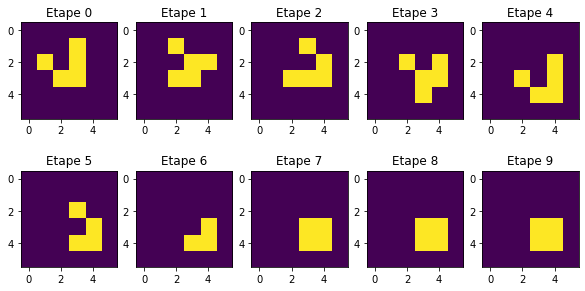

In [9]:
utils.show(Z)

Entre l'itération 0 et 4, on constate que les cellules vivantes se déplacent progressivement du milieu de la grille vers le côté en bas à droite de celle-ci. Après l'étape 7 il n'y a plus d'évolution de la grille puisqu'en effet chacune des cellules vivantes est dans des conditions adéquates pour rester vivante: les 4 cellules restantes ont chacune 3 voisins. Dans cette situation, les autres cellules qui, elles, sont mortes ont au plus 2 voisins ce qui n'est pas suffisant pour vivre.

### Implémentation avec `Numpy`

In [10]:
# 7)Que vaut le vecteur nb_vect?

vect = np.array([0, 1, 0, 0, 1, 1]) 
nb_vect = np.zeros(vect.shape) # vecteur de la même dimension que vect rempli de 0
nb_vect[1:-1] += (vect[:-2] + vect[2:])
# vect[2:] séléctionne tous les élèments de vect sauf les deux premiers
# vect[:-2] séléctionne tous les élèments de vect sauf les deux derniers
# à part pour les premiers et derniers élèment du vecteur vect
# on somme sur chaque coordonnée la précédente et la suivante

nb_vect

array([0., 0., 1., 1., 1., 0.])

On ne s'intéresse pas aux bords du vecteur de même que l'on ne s'intéressait pas aux bords de la matrice. Le vecteur *nb_vect* est le nombre de voisins de chaque élèment du vecteur *vect*.

On souhaite maintenant définir une fonction *calcul_nb_voisins_np* qui prend en entrée une matrice Z et qui retourne le nombre de voisins pour chaque entrée et qui vaut zéro sur le pourtour. On se servira ici du ***slicing***:

In [11]:
# 8)Calcul du nombre de voisins grâce au slicing

def calcul_nb_voisins_np(Z):
    
    """Calcul du nombre de voisins dans une matrice grâce au slicing
    
    Entrée: Une matrice carrée composée de 1 et de 0
       
    Sortie: Le nombre de voisins de chaque cellule sauf pour le bord
    
    """
    
    Z = np.array(Z)
    nb_voisins_np = np.zeros(Z.shape) # matrice de la même dimension que Z remplie de zéros
    # chaque cellule est au plus entourée de 8 cellules
    # il nous faut sommer chacune de ces 8 cellules:
    nb_voisins_np[1:-1, 1:-1] = Z[1:-1, :-2] + \
    Z[:-2, :-2] + Z[:-2, 2:] + Z[2:, 2:] + Z[2:, :-2] + \
    Z[1:-1, 2:] + Z[:-2, 1:-1] + Z[2:, 1:-1]
    return(nb_voisins_np)

In [12]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

calcul_nb_voisins_np(Z)

array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 3., 1., 2., 0.],
       [0., 1., 5., 3., 3., 0.],
       [0., 2., 3., 2., 2., 0.],
       [0., 1., 2., 2., 1., 0.],
       [0., 0., 0., 0., 0., 0.]])

On vérifie de plus que le résultat est le même que celui obtenu avec la fonction *calcul_nb_voisins*:

In [13]:
calcul_nb_voisins_np(Z) == calcul_nb_voisins(Z)

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

On adapte maintenant une nouvelle fonction *iteration_jeu_np* qui renvoie une itération du jeu de la vie grâce à ce qui vient d'être fait précédemment:

In [14]:
# 9)Fonction similaire à iteration_jeu mais on travaille cette fois avec des np.array

def iteration_jeu_np(Z): 
    
    """Fonction qui calcule une itération du jeu de la vie grâce au slicing
    
    Entrée: une liste de listes composées de 1 ou de 0
       
    Sortie: une itération du jeu
    
    """
    
    forme = len(Z), len(Z[0]) 
    Z = np.array(Z) # On travaille cette fois avec des array
    N = calcul_nb_voisins_np(Z) # On utilise cette fois calcul_nb_voisins_np
    for x in range(1, forme[0]-1): 
        for y in range(1, forme[1]-1): 
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3): 
                Z[x][y] = 0 
            elif Z[x][y] == 0 and N[x][y] == 3: 
                Z[x][y] = 1 
    return Z

On vérifie encore que cette fonction renvoie bien la même chose que *iteration_jeu*:

In [15]:
iteration_jeu_np(Z) == iteration_jeu(Z)

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

On souhaite maintenant implémenter la fonction qui retournera autant d'itérations du jeu de la vie que demandées, on l'appelle *jeu_np*:

In [16]:
# 10)Fonction qui donne n itérations du jeu

def jeu_np(Z_in, nb_iter):
   
    """ Fonction qui donne la n-ième itérationn du jeu de la vie
    
    Entrée: Une matrice Z_in carrée composée de 0 et et de 1
            Un nombre entier non nul positif d'itérations nb_iter
       
    Sortie: Etat du jeu après nb_iter itérations
    
    """

    for i in range(1, nb_iter+1):
        Z_in = iteration_jeu_np(Z_in)
    return(Z_in)    

In [17]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

jeu_np(Z, 10)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

On va maintenant implémenter une animation qui affichera toutes les itérations du jeu de la vie pour une matrice de dimension beaucoup plus grande que précédemment:

In [18]:
# 11)Implémentation de la matrice Z_huge

Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])

Z_huge[10:16, 10:16] = Z_np
Z_huge

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
def mon_animation(Z_in, nb_iter):

    """Fonction qui génère l'animation d'un nombre souhaité d'itérations du jeu de la vie
    
    Entrée: Une matrice carrée composée de 1 et de 0
            Un nombre entier positif d'itérations
    
    Sortie: La succession de chacune des itérations 
    souhaitées du jeu de la vie pour la matrice en entrée
    
    """
    
    fig = plt.imshow(Z_in)
    plt.title("Animation du jeu")
    

    def animate(nb_iters):
        fig.set_data(jeu_np(np.array(Z_in), nb_iters))
        return fig
    gif = animation.FuncAnimation(plt.figure(), animate, frames=nb_iter)
    return(gif)
    plt.show()

Traceback (most recent call last):
  File "C:\Users\megan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\megan\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


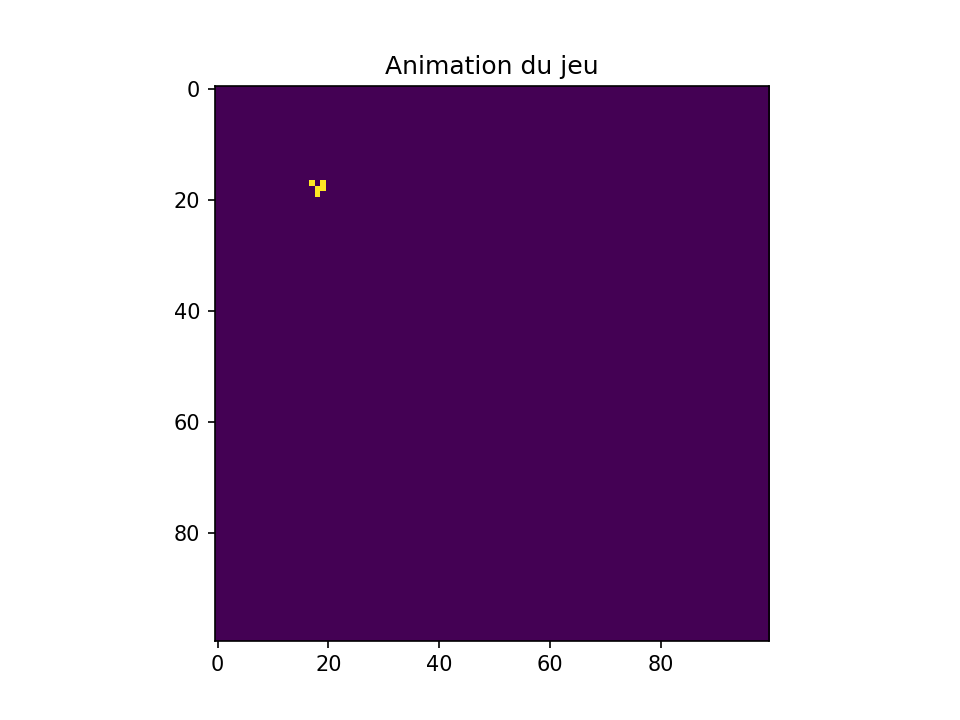

<IPython.core.display.Javascript object>


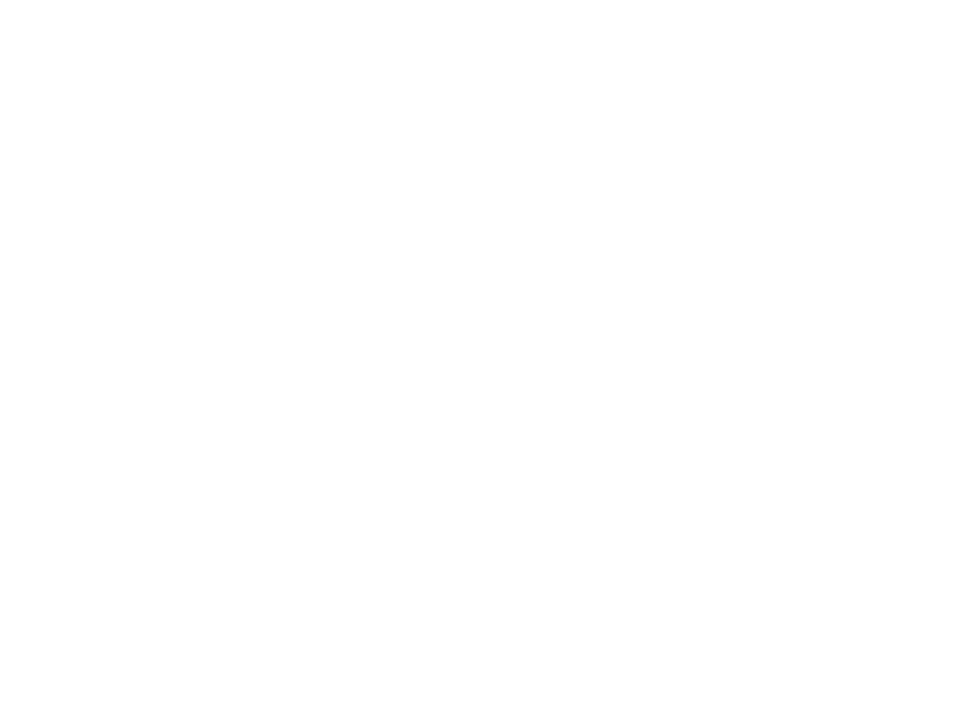

In [27]:
%matplotlib notebook
mon_animation(Z_huge, 50)

# Veuillez relancer cette cellule si l'animation de se lance pas
# Selon l'ordinateur utilisé, un "warning" s'affiche (pas systématiquement) avant l'animation
# Impossible de comprendre comment s'en débarasser ni à quoi il est du
# https://github.com/ipython/ipython/issues/10873 (lien trouvé sur le sujet)
# De plus une seconde figure vide s'affiche systématiquement après chaque animation
# Impossible de comprendre pourquoi, ni de m'en débarasser

Nous allons maintenant créer une matrice personnalisée grâce à *ma_graine*:

<IPython.core.display.Javascript object>


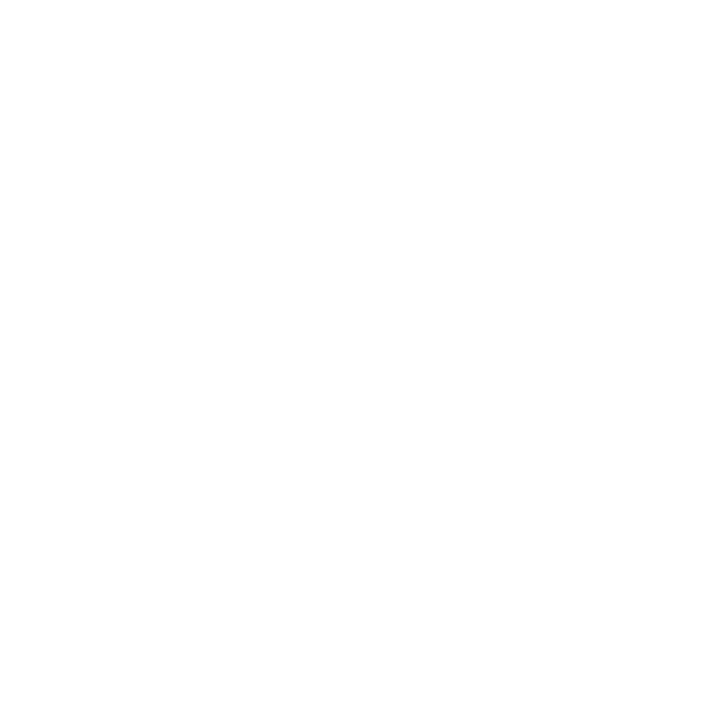

Text(0.5, 1.05, 'Ma matrice aléatoire')

In [21]:
# 12)Matrice aléatoire 100x100 remplie de 1 et de 0 
# dont la proportion de 1 est en espérance égale à (1 + ma_graine) * 10 / 100

M = np.zeros((100, 100))
prop_active = (1 + ma_graine) * 10 / 100
M[1:-1, 1:-1] = np.random.binomial(n=1, 
                p=prop_active, size=98*98).reshape(98, 98)
plt.matshow(M)
plt.title('Ma matrice aléatoire')

# Veuillez relancer la cellule pour afficher la matrice aléatoire

On peut maintenant appliquer le jeu de la vie à cette nouvelle matrice, en voici l'animation:

Traceback (most recent call last):
  File "C:\Users\megan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\megan\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


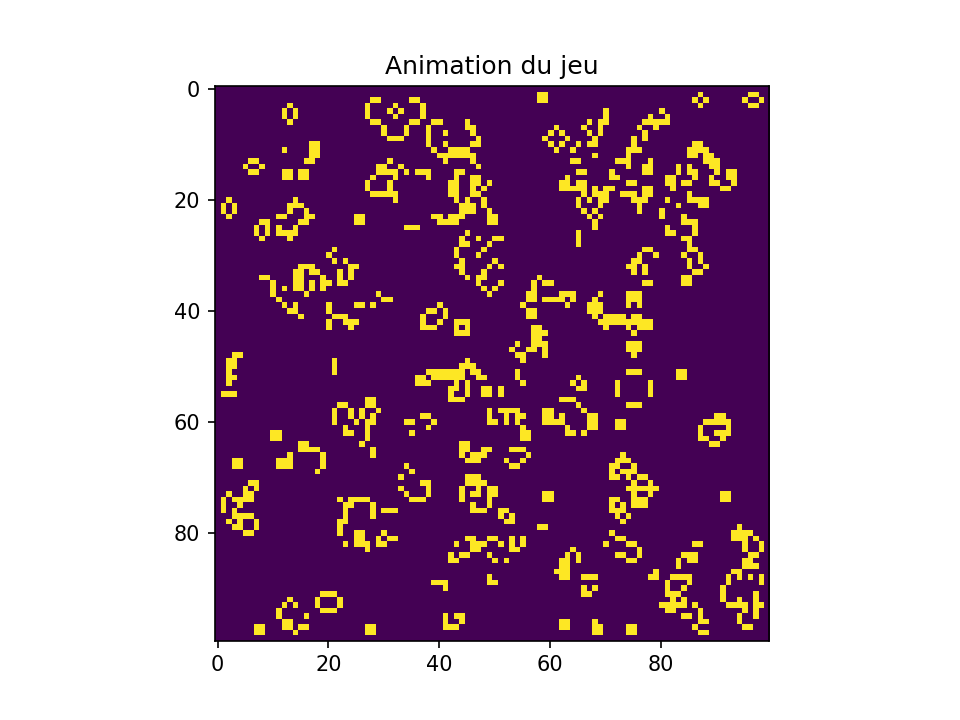

<IPython.core.display.Javascript object>


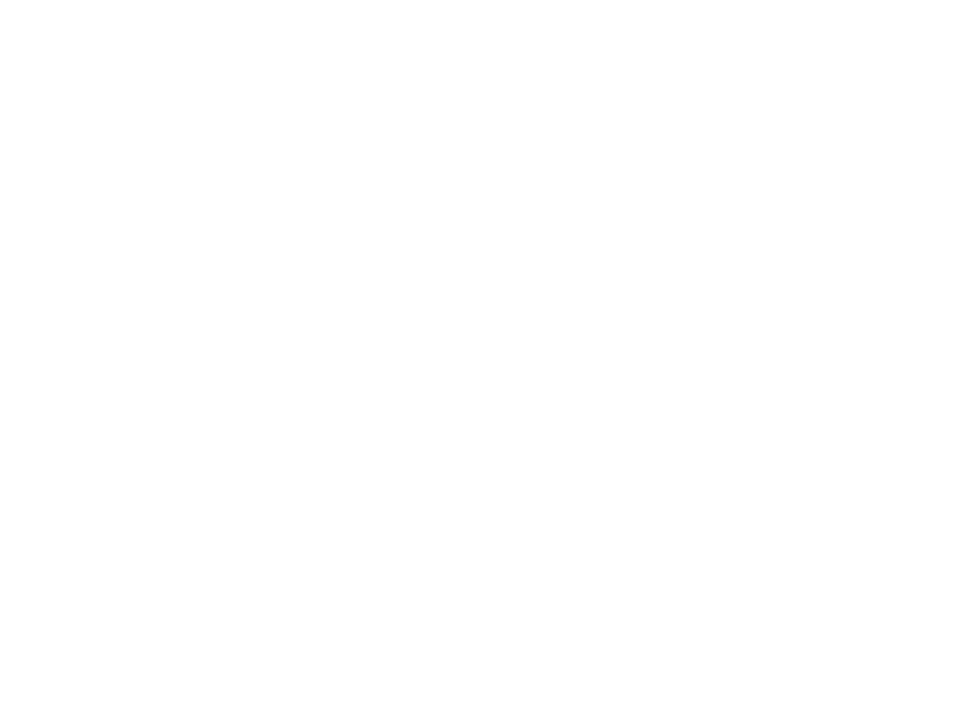

In [22]:
%matplotlib notebook
mon_animation(M, 50)

# Veuillez relancer la cellule si l'animation ne s'affiche pas
# Voir plus haut pour le "warning" et la seconde figure

On souhaite maintenant afficher 10 itérations de trois matrices de taille 50 x 50 qui représentent des jeux qui sont fixes dans le temps.
Nous choisissons 3 configurations différentes:
  + La ruche
  + Le tube
  + Le navire

<IPython.core.display.Javascript object>


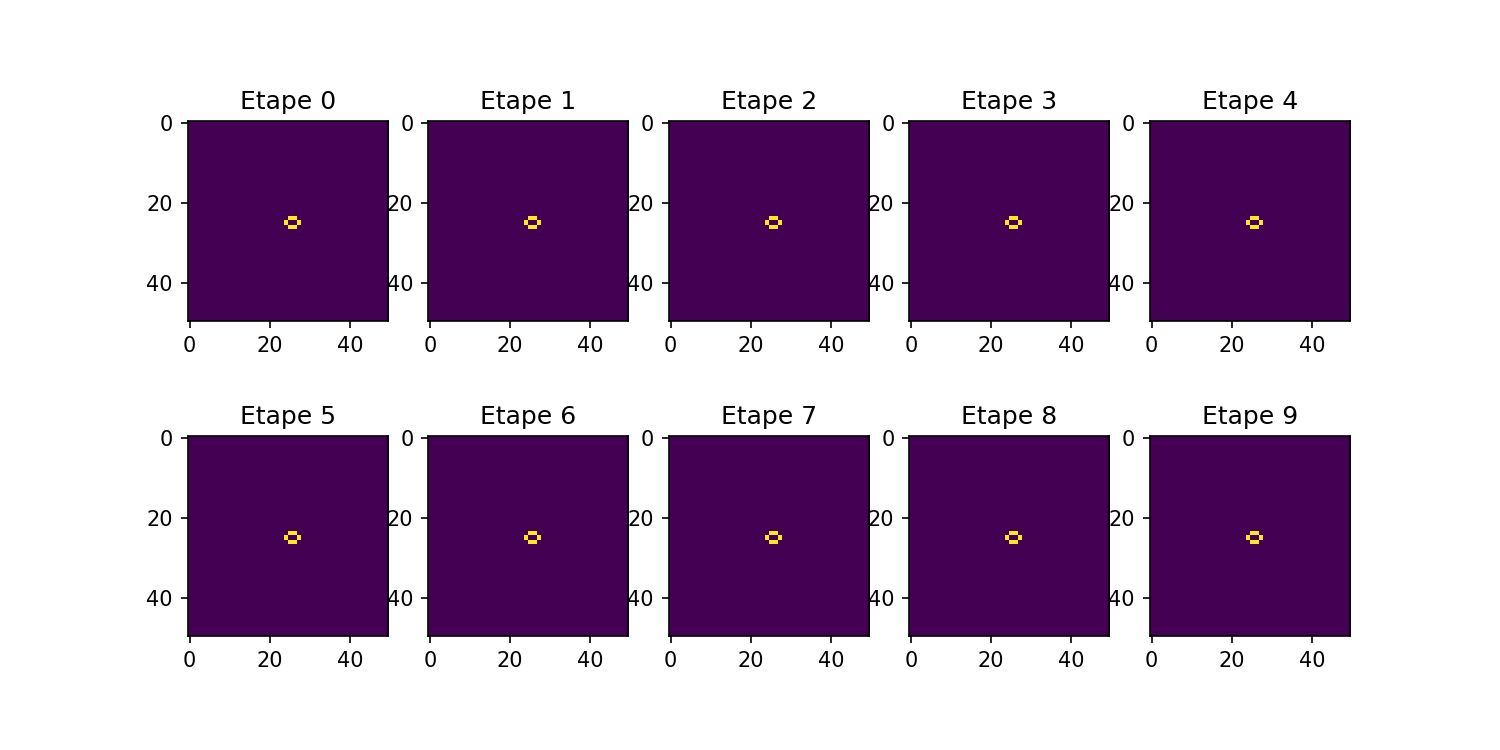

<IPython.core.display.Javascript object>


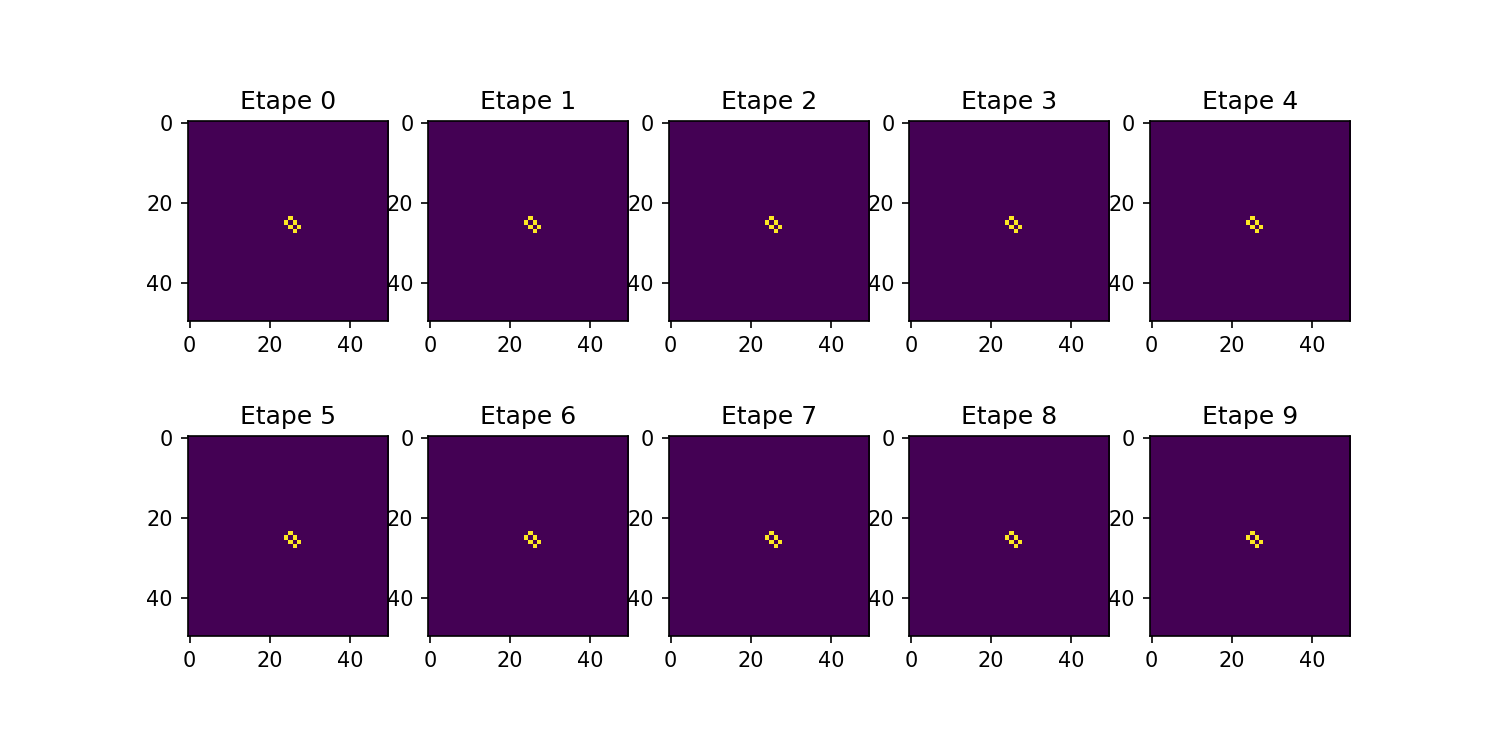

<IPython.core.display.Javascript object>


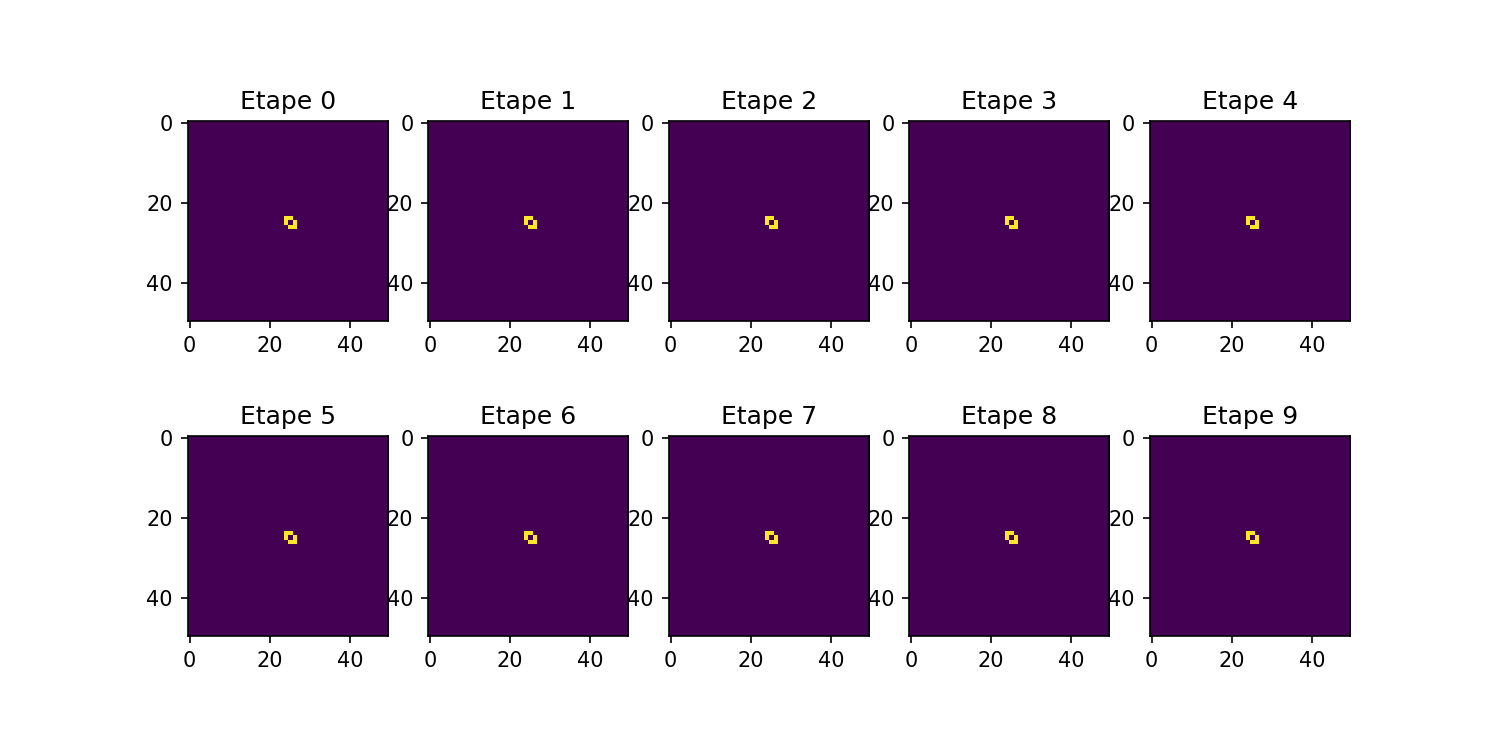

In [23]:
# 13) Configurations stables

utils.show(utils.R)
utils.show(utils.T)
utils.show(utils.N)

# Veuillez relancer la cellule si les images ne s'affichent pas

On choisit maintenant une matrice qui représente un jeu dont l'état oscille avec une période de deux: "la grenouille"

<IPython.core.display.Javascript object>


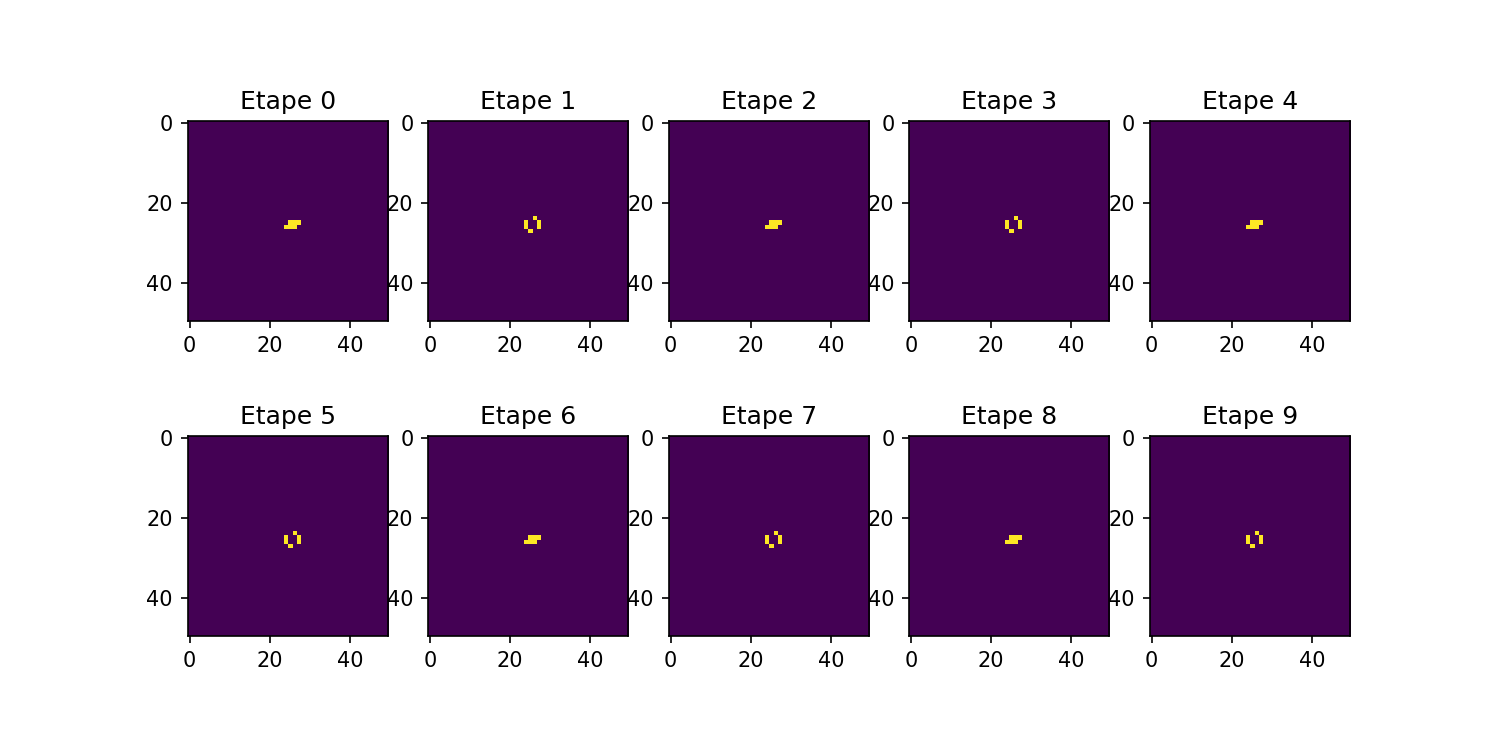

In [24]:
# Configuration oscillante 

utils.show(utils.G)

# Veuillez relancer la cellule si l'image ne s'affiche pas

In [25]:
# 14)Mise du jeu sous la forme d'une classe

class JeuDeLaVie:
    
    def __init__(self, init_state, _time_T):
        self.init_state = init_state
        self._time_T = _time_T
        self._dimension = (n_1, n_2) = init_state.shape
        self._historic_state = np.zeros((n_1, n_2, _time_T+1))
        self._historic_state[:, :, 0] = self.init_state
        self.average_life = np.zeros((n_1, n_2))

    def play(self):
        t = 1
        while (t <= self._time_T):
            self._historic_state[:, :, t] = iteration_jeu_np(
                self._historic_state[:, :, t-1])
            self.average_life = np.mean(self._historic_state, axis=(2))
            t = t + 1

    def plot(self):
        plt.figure()
        plt.imshow(self.average_life)
        plt.title("Temps de vie moyen de chaque cellule")
        plt.colorbar()

On teste maintenant le jeu sur la matrice aléatoire construite auparavant: 

<IPython.core.display.Javascript object>


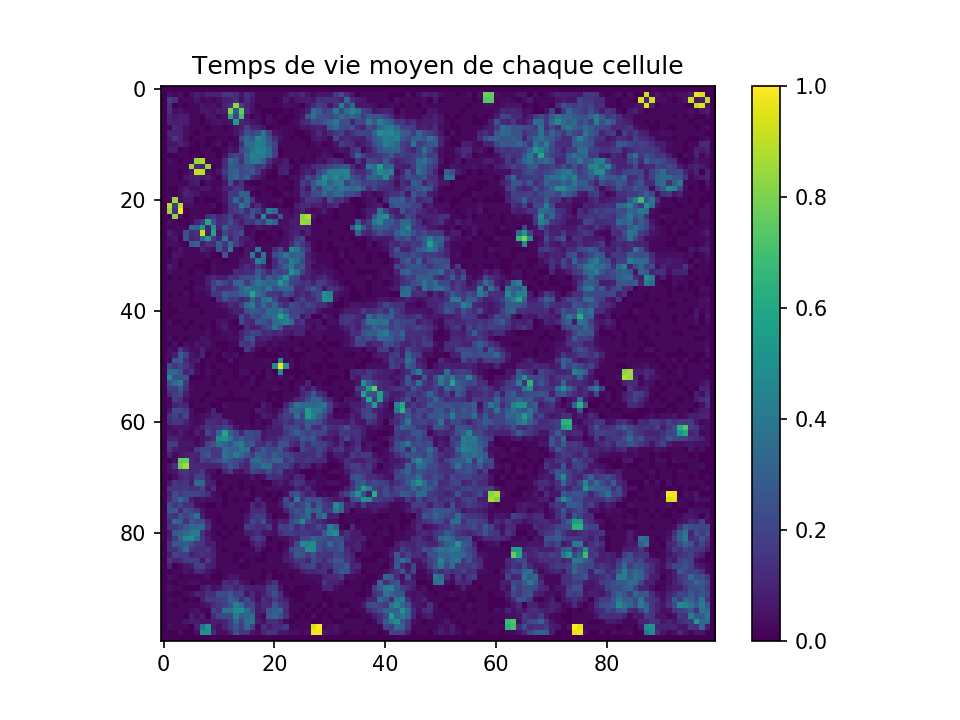

In [28]:
Survie_Ma_matrice = JeuDeLaVie(np.array(M), 50)
Survie_Ma_matrice.play()
Survie_Ma_matrice.plot()

On constate que ce sont le configurations stables qui ont le temps de vie moyen le plus long. On retrouve notamment la configuration "ruche" vue précédemment.